## Preprocess lidc_metadata.csv

In [4]:
import pandas as pd

metadata_path = "dataset/lidc_metadata.csv"
df = pd.read_csv(metadata_path)

print(df.head())  # View first few rows
print(df.columns)  # Check available columns

          case_id               image_id projection findings
0  LIDC-IDRI-0001  LIDC-IDRI-0001-000001    Frontal  Nodules
1  LIDC-IDRI-0001  LIDC-IDRI-0001-000002    Lateral  Nodules
2  LIDC-IDRI-0003  LIDC-IDRI-0003-000001    Frontal  Nodules
3  LIDC-IDRI-0003  LIDC-IDRI-0003-000002    Lateral  Nodules
4  LIDC-IDRI-0004  LIDC-IDRI-0004-000001    Frontal  Nodules
Index(['case_id', 'image_id', 'projection', 'findings'], dtype='object')


In [6]:
print(df["findings"].isna().sum())  # Count NaN values

23


In [7]:
df["findings"].fillna("No Nodules", inplace=True)

In [8]:
print(df["findings"].unique())  # Should show ['Nodules', 'No Nodules']

['Nodules' 'No Nodules']


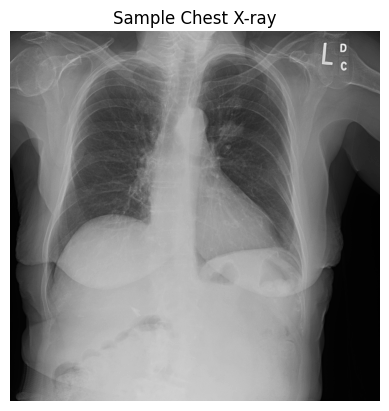

In [2]:
import pydicom
import matplotlib.pyplot as plt

dicom_path = "dataset/images/images/LIDC-IDRI-0001-000001.dcm"
dicom_data = pydicom.dcmread(dicom_path)

plt.imshow(dicom_data.pixel_array, cmap="gray")
plt.title("Sample Chest X-ray")
plt.axis("off")
plt.show()

In [3]:
print(dicom_data)

Dataset.file_meta -------------------------------
(0002,0000) File Meta Information Group Length  UL: 198
(0002,0001) File Meta Information Version       OB: b'\x00\x01'
(0002,0002) Media Storage SOP Class UID         UI: Digital X-Ray Image Storage - For Presentation
(0002,0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.14519.5.2.1.6279.6001.307896144859643716158189196068
(0002,0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002,0012) Implementation Class UID            UI: 1.2.40.0.13.1.1.1
(0002,0013) Implementation Version Name         SH: 'dcm4che-1.4.35'
-------------------------------------------------
(0008,0005) Specific Character Set              CS: 'ISO_IR 100'
(0008,0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', '']
(0008,0016) SOP Class UID                       UI: Digital X-Ray Image Storage - For Presentation
(0008,0018) SOP Instance UID                    UI: 1.3.6.1.4.1.14519.5.2.1.6279.6001.30789614485964371

## Organize Images into Classes (Nodule vs. No Nodule)

In [9]:
import os
import shutil
import pandas as pd

# Paths
dataset_path = "dataset/images/images"  # Path to DICOM images
output_dir = "processed_data"
nodule_dir = os.path.join(output_dir, "nodules")
non_nodule_dir = os.path.join(output_dir, "non_nodules")

# Create folders
os.makedirs(nodule_dir, exist_ok=True)
os.makedirs(non_nodule_dir, exist_ok=True)

# Load metadata
df = pd.read_csv("dataset/lidc_metadata.csv")

# Fill NaN findings with "No Nodules"
df["findings"].fillna("No Nodules", inplace=True)

# Organize images
for _, row in df.iterrows():
    image_filename = row["image_id"] + ".dcm"
    image_path = os.path.join(dataset_path, image_filename)

    if os.path.exists(image_path):  # Ensure the file exists
        if row["findings"] == "Nodules":
            shutil.copy(image_path, nodule_dir)
        else:
            shutil.copy(image_path, non_nodule_dir)
